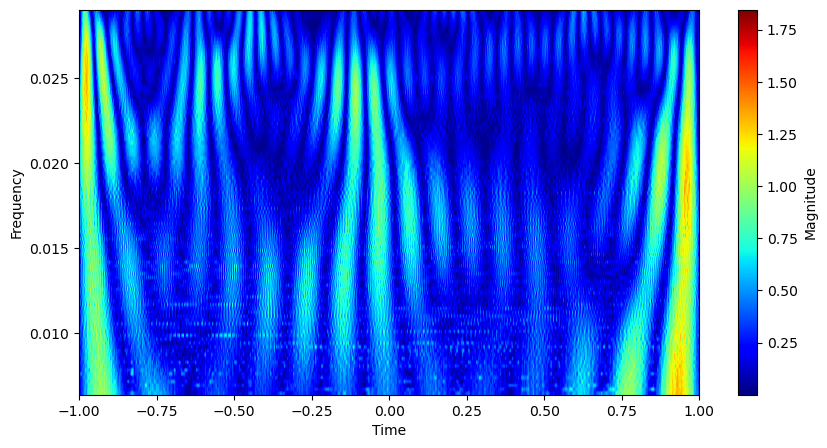

In [9]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# 生成示例信号
signal = np.random.rand(1024)

# 设置尺范围
# scales = pywt.scale2frequency('morl', np.arange(10, 128))  # 根据小波基函数和尺度数组计算对应的频率数组

# 进行CWT计算
coefficients, frequencies = pywt.cwt(signal,  np.arange(28, 128), 'morl')  # 使用'morl'小波基函数

# 绘制热力图
plt.figure(figsize=(10, 5))
plt.imshow(np.abs(coefficients), extent=[-1, 1, frequencies[-1], frequencies[0]], aspect='auto', cmap='jet')
plt.colorbar(label='Magnitude')
# plt('Continuous Wavelet Transform')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()


## pywavelets库中cwt函数的使用以及绘制图形

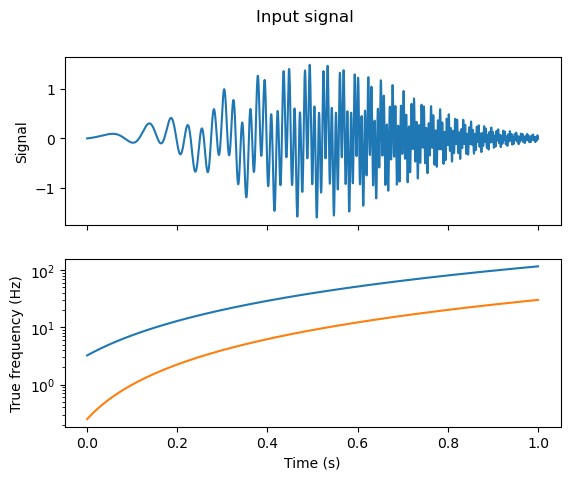

In [10]:
import matplotlib.pyplot as plt
import numpy as np

import pywt


def gaussian(x, x0, sigma):
    return np.exp(-np.power((x - x0) / sigma, 2.0) / 2.0)


def make_chirp(t, t0, a):
    frequency = (a * (t + t0)) ** 2
    chirp = np.sin(2 * np.pi * frequency * t)
    return chirp, frequency


# generate signal
time = np.linspace(0, 1, 2000)
chirp1, frequency1 = make_chirp(time, 0.2, 9)
chirp2, frequency2 = make_chirp(time, 0.1, 5)
chirp = chirp1 + 0.6 * chirp2
chirp *= gaussian(time, 0.5, 0.2)

# plot signal
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(time, chirp)
axs[1].plot(time, frequency1)
axs[1].plot(time, frequency2)
axs[1].set_yscale("log")
axs[1].set_xlabel("Time (s)")
axs[0].set_ylabel("Signal")
axs[1].set_ylabel("True frequency (Hz)")
plt.suptitle("Input signal")
plt.show()

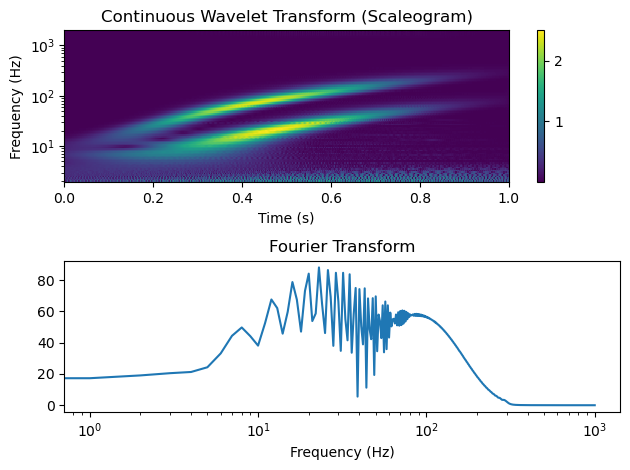

In [11]:
# perform CWT
wavelet = "cmor1.5-1.0"
# logarithmic scale for scales, as suggested by Torrence & Compo:
widths = np.geomspace(1, 1024, num=100)
sampling_period = np.diff(time).mean()
cwtmatr, freqs = pywt.cwt(chirp, widths, wavelet, sampling_period=sampling_period)
# absolute take absolute value of complex result
cwtmatr = np.abs(cwtmatr[:-1, :-1])

# plot result using matplotlib's pcolormesh (image with annoted axes)
fig, axs = plt.subplots(2, 1)
pcm = axs[0].pcolormesh(time, freqs, cwtmatr)
axs[0].set_yscale("log")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Frequency (Hz)")
axs[0].set_title("Continuous Wavelet Transform (Scaleogram)")
fig.colorbar(pcm, ax=axs[0])

# plot fourier transform for comparison
from numpy.fft import rfft, rfftfreq

yf = rfft(chirp)
xf = rfftfreq(len(chirp), sampling_period)
plt.semilogx(xf, np.abs(yf))
axs[1].set_xlabel("Frequency (Hz)")
axs[1].set_title("Fourier Transform")
plt.tight_layout()

## Savitzky-Golay 滤波器的简单使用

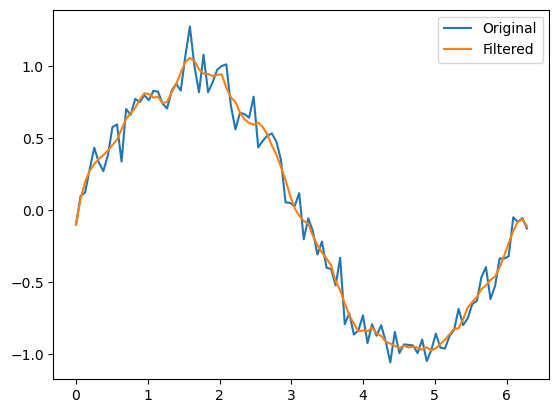

In [14]:
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

# 生成一些示例数据
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + np.random.normal(0, 0.1, 100)  # 添加一些噪声

# 对数据进行 Savitzky-Golay 滤波
y_filtered = savgol_filter(y, window_length=15, polyorder=4)

# 绘制原始数据和滤波后的数据
plt.plot(x, y, label='Original')
plt.plot(x, y_filtered, label='Filtered')
plt.legend()
plt.show()
